# I. Installation des librairies

Installation des packages à partir de fichier `requirements.txt`

# II. Importation des libairies des librairies

In [1]:
# Manipulation des données
import math
import numpy as np
import pandas as pd

# Visualitation
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['grid.color'] = 'b0b0b0'
plt.rcParams['grid.alpha'] = 0.75
import seaborn as sns

# Modèles de régression
import sklearn
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Vérification des résultats de sklearn
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import cvxopt

# Répertoire de travail et gestion d'erreur
import os
import warnings

# Fichier python contenant les fonctions
import function_simulation_tools
from function_simulation_tools import simulation_residus, statistics_residus, visualization_residus, simulation_X_y, sampling, regularized_regressions, visualization_shrinking

# III. Définition du repertoire de travail

In [2]:
# Définition du repertoire de travail
chemin = r"C:\Users\lajoi\Documents\1_PROGRAMME DE TRAVAIL\PROGRAMMATION\SimulationRidgeLasso"
mkdir_data = "results_data"
mkdir_graphics = "results_graphiques"

# Création des dossiers
try :

    # Définir le repertoire de travail
    os.chdir(chemin)

    # Création du dossier pour les graphiques
    os.mkdir(mkdir_data)

    # Création du dossier pour les bases de données
    os.mkdir(mkdir_graphics)

except FileExistsError:
    print("L'un des dossiers existe déjà")


L'un des dossiers existe déjà


# IV. Simulation des données

In [3]:
# Noyau de reprdductibilité
random_state_seed = 1980

## IV.1 Simulation Residus

In [4]:
# Taille de la population
PopulationSize = 5000

# Paramètre de la loi Moyenne
LoiMoyenne = 0.007

# Paramètre de la variance
LoiVariance = 1.7

# Fonction pour simuler les residus
Residus = function_simulation_tools.simulation_residus(
    PopulationSize=PopulationSize,
    LoiMoyenne=LoiMoyenne,
    LoiVariance=LoiVariance
)
Residus

array([-1.25070651,  1.53519062,  0.14515761, ..., -0.03069949,
        0.07142035, -0.61661169], shape=(5000,))

## VI.2 Statistiques Descriptives des residus Simulées

In [5]:
# Fonction pour analyser les residus à partir des statistiques descriptivec
function_simulation_tools.statistics_residus(Residus)

,Noms,Valeurs
0,Nombre,5000.000
1,Moyenne,-0.019
2,Variance,2.953
3,Quantile25,-1.191
4,Quantile50,-0.014
5,Quantile75,1.131
6,Min,-5.681
7,Max,6.126


## VI.2 Visualisation des residus Simulées


[]

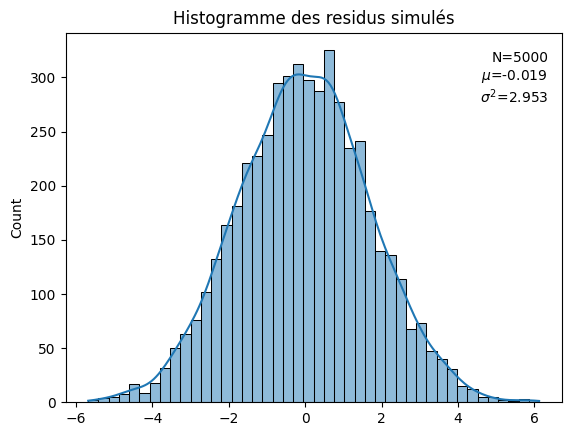

In [48]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Histogramme')

In [50]:
plt.savefig(f'{mkdir_graphics}/visualisation_histogram_residus.png')

<Figure size 640x480 with 0 Axes>

[]

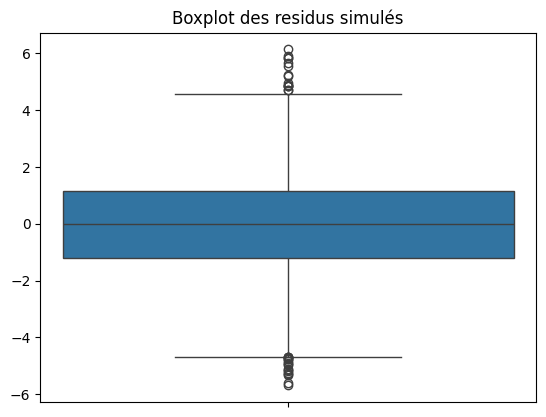

In [8]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Boxplot')

In [9]:
plt.savefig(f'{mkdir_graphics}/visualisation_boxplot_residus.png')


<Figure size 640x480 with 0 Axes>

## IV.3 Simulation des variables d'entrée X et de la variable cible y

In [10]:
# Nombre de Variables d'entrée
FeatureNumber = 8
Coefs_B = [0.69, 1.41, 2.73, -2.84, -3, 3.14, -7, 11]

# Fonction pour simuler les variables d'entrée X et la variable cible y
data_population = function_simulation_tools.simulation_X_y(
    PopulationSize=PopulationSize,
    FeatureNumber=FeatureNumber,
    Coefs_B=Coefs_B,
    Residus=Residus,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_population.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-2.101035,-1.151514,0.056578,0.625905,1.698989,-1.181865,0.689376,0.532623,0.090816
1,-0.549363,-1.354884,0.090326,0.766721,1.588549,1.453207,0.564089,0.597769,0.719459
2,-5.226830,0.390334,0.050878,0.620461,1.113926,0.650452,-0.178577,0.605067,0.227654
3,-0.848379,-0.823722,0.079268,0.688097,0.679008,0.855681,0.481480,0.406786,0.266656
4,-4.213862,-0.074209,0.045706,0.565449,0.643496,-0.837548,-0.203731,0.536650,-0.083748


## IV.4 Constitution de l'échantillon


In [11]:
# Taille de l'échantillon souhaitée
SampleSize = 1000

# Fonction pour constituer un échantillon à partir des données de la population
data_sample = function_simulation_tools.sampling(
    dataframe_population=data_population,
    SampleSize=SampleSize,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_sample.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
888,11.971990,-0.074583,0.057682,0.831262,0.468929,-0.024793,0.737874,0.250837,0.977602
1240,-4.618505,-0.665206,0.069854,0.821082,2.719892,-1.054131,0.022105,0.646361,0.253455
3079,-1.672278,-0.422928,0.049502,0.645371,1.143765,0.438268,0.215191,0.417476,0.510545
538,-1.187008,-0.182922,0.047633,0.578290,1.406609,-0.414186,-0.362289,0.316792,0.403354
3403,-4.069689,0.184071,0.043890,0.809818,1.176001,-0.374659,-0.435579,0.468224,0.140625


In [12]:
# Sauvegarde des données de l'échantillon
data_sample.to_csv("results_data/data_sample.csv", index=False)

## IV.5 Séparation de la base de données échantillon


In [13]:
# Base d'apprentissage et d'évaluation à l'aide de la validation croissée
data_train, data_test = train_test_split(data_sample, test_size=0.25, random_state=random_state_seed)

In [14]:
# Sauvegarde des données d'entrainement et des données d'évaluation
data_train.to_csv('results_data/data_train.csv', index = False)
data_test.to_csv('results_data/data_test.csv', index = False)

## IV.6 Choix de la base de données pour l'étude


In [15]:
# Bases de données probables
data_names = ['data_population', 'data_sample', 'data_train', 'data_test']

# Base de dnnées de l'étude
data_final = pd.read_csv(f"{mkdir_data}/{data_names[2]}.csv")

# Aperçu de la base de données
data_final.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-4.374888,0.251293,0.035746,0.876699,-0.345669,1.234569,-0.451263,0.640097,0.578980
1,-8.574255,-1.158085,0.054516,0.616051,2.847318,0.356752,0.257534,0.603663,-0.108521
2,-12.390330,-0.976584,0.067042,0.750432,0.480921,2.007230,-0.422042,0.473006,-0.155143
3,-2.721676,0.422928,0.039707,0.694224,1.333130,-0.166990,-0.873633,0.183061,0.367493
4,2.849529,0.097177,0.055257,0.567558,-0.152872,-1.034398,0.253904,0.745530,0.372038


In [16]:
# Variable à prédire
Target = np.array(data_sample['y']).reshape(-1,1)

# Variables prédictives
Predictors = data_sample.drop('y', axis=1)

# Variables prédictives standardisées : Ridge et Lasso
# scaler = StandardScaler()
# Predictors_scaled_array = scaler.fit_transform(Predictors)
# Predictors_scaled = pd.DataFrame(Predictors_scaled_array, columns=Predictors.columns)

# V. Régression

## 3.1 Estimation

In [17]:
# Estimation du modèle de Régression par MCO avec constante
RegMCO = LinearRegression(fit_intercept=True)
RegMCO.fit(Predictors, Target)

LinearRegression()

## 3.2 Résultats

In [18]:
# Résultats du modèle de régression par MCO
RegMCO.coef_

array([[ 0.62887154,  5.54559502,  3.24517496, -2.8524589 , -3.02420317,
         3.20775627, -6.97966159, 10.69205965]])

In [19]:
# Estimation du modèle de Régression par MCO avec constante
RegressionsModels = OLS(Target, sm.add_constant(Predictors))
regMC0_sm = RegressionsModels.fit()

# Résultats du modèle de régression par MCO
regMC0_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1129.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        04:15:30   Log-Likelihood:                -1971.7
No. Observations:                1000   AIC:                             3961.
Df Residuals:                     991   BIC:                             4006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4934      0.465     -1.060      0.289      -1.407       0.420
X_1            0.6289      0.065      9.633      0.000       0.501       0.757
X_2            5.5456      2.808      1.975      0.049       0.035      11.056
X_3            3.2452      0.628      5.165      0.000       2.012       4.478
X_4           -2.8525      0.067    -42.838      0.000      -2.983      -2.722
X_5           -3.0242      0.059    -51.515      0.000      -3.139      -2.909
X_6            3.2078      0.110     29.277      0.000       2.993       3.423
X_7           -6.9797      0.334    -20.890      0.000      -7.635      -6.324
X_8           10.6921      0.191     56.096      0.000      10.318      11.066
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.106
Skew:                          -0.024   Prob(JB):                        0.948
Kurtosis:                       3.017   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Régression Régularisée RIDGE

## 4.1 Coefficient de Pénalisation

In [20]:
# Définition du coefficient de pénalisaton
CoefPenalisation = 0.15

## 4.2 Estimation

In [21]:
# Estimation du modèle par Régression Régularisée : Ridge
RegRidge = Ridge(alpha=CoefPenalisation, fit_intercept=True, random_state=random_state_seed)
RegRidge.fit(Predictors, Target)

Ridge(alpha=0.15, random_state=1980)

## 4.3 Résultats


```python

# GRIDSEARCHCV SANS PIPELINE
----------------------------


# Importation de la fonction Pipeline
from sklearn.pipeline import Pipeline

# Paramètre de la régression Ridge
RegRidge_params = {
    'alpha' : [0.15, 2, 3]
}

RegRidge_GridSearchCV = GridSearchCV(estimator=RegRidge, param_grid=RegRidge_params, cv=3)
print(RegRidge)

RegRidge_GridSearchCV.fit(Predictors, Target)

pd.DataFrame(RegRidge_GridSearchCV.cv_results_)

RegRidge_GridSearchCV.cv_results_['param_alpha'][0]

# GRIDSEARCHCV AVEC PIPELINE
----------------------------

# Importation de la fonction Pipeline
from sklearn.pipeline import Pipeline

ridge_model = Ridge()

# Construction d'un pipeline
pipe = Pipeline([
    ('model', ridge_model)
])

pipe.fit(Predictors, Target)

RegRidge_params = {
    'model__alpha' : [0.15, 2, 3]
}
ridge_pipeline = GridSearchCV(estimator=pipe, param_grid=RegRidge_params, cv=3)
ridge_pipeline.fit(Predictors, Target)



In [22]:
alpha_list = np.arange(start=0, stop=50, step=5)
alpha_list

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [23]:
Summary_ridge_coef = regularized_regressions(Predictors=Predictors, Target=Target, Alpha_list=alpha_list, Intercept=True, Model='ridge', Random_State_Seed=random_state_seed)
Summary_ridge_coef

,Variables,0,5,10,15,20,25,30,35,40,45
0,Intercept,-0.493368,0.276672,0.435218,0.488752,0.507250,0.512588,0.512816,0.511143,0.508881,0.506550
1,X_1,0.628872,0.620606,0.607414,0.595110,0.583737,0.573232,0.563512,0.554498,0.546117,0.538303
2,X_2,5.545595,0.403804,0.207389,0.137826,0.102270,0.080752,0.066379,0.056131,0.048478,0.042558
3,X_3,3.245175,2.053184,1.503560,1.193080,0.992921,0.852734,0.748809,0.668511,0.604488,0.552164
4,X_4,-2.852459,-2.837073,-2.819003,-2.800898,-2.782831,-2.764840,-2.746954,-2.729191,-2.711569,-2.694098
5,X_5,-3.024203,-3.006052,-2.988402,-2.971725,-2.955625,-2.939903,-2.924453,-2.909211,-2.894141,-2.879220
6,X_6,3.207756,3.136274,3.074096,3.014464,2.957128,2.901947,2.848801,2.797580,2.748181,2.700508
7,X_7,-6.979662,-5.857673,-5.044603,-4.426573,-3.941163,-3.550029,-3.228290,-2.959094,-2.730623,-2.534347
8,X_8,10.692060,10.079814,9.535616,9.047325,8.607093,8.208174,7.844967,7.512833,7.207910,6.926955


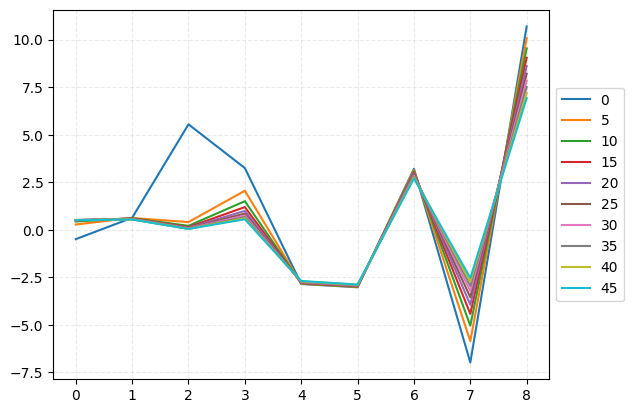

In [24]:
# Fonction pour visualiser le  des coefficients en fonction de lambda
Summary_ridge_coef.plot(kind='line')
plt.grid(True, linestyle ='--', alpha=0.25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
plt.savefig(f'{mkdir_graphics}/visualisation_lambda_ridge.png')

<Figure size 640x480 with 0 Axes>

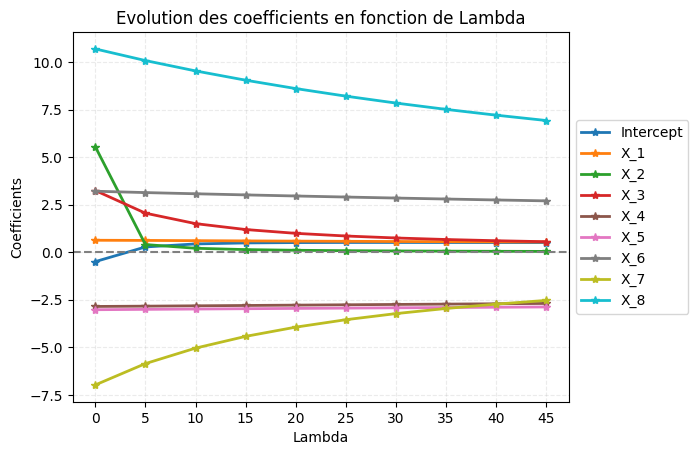

In [26]:
# Fonction pour visualiser le retrecissement des coefficients en fonction de lambda
visualization_shrinking(Summary_ridge_coef)

In [27]:
plt.savefig(f'{mkdir_graphics}/visualisation_coefficient_skrinkage_ridge.png')

<Figure size 640x480 with 0 Axes>

## 4.4 Vérification

In [28]:
# Estimation de la régression Ridge
regRidge_sm = RegressionsModels.fit_regularized(
    method='sqrt_lasso',
    alpha=CoefPenalisation,
    L1_wt=0
)
regRidge_sm_regularized = RegressionsModels.fit(start_params=regRidge_sm.params)
regRidge_sm_regularized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1129.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        04:15:32   Log-Likelihood:                -1971.7
No. Observations:                1000   AIC:                             3961.
Df Residuals:                     991   BIC:                             4006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4934      0.465     -1.060      0.289      -1.407       0.420
X_1            0.6289      0.065      9.633      0.000       0.501       0.757
X_2            5.5456      2.808      1.975      0.049       0.035      11.056
X_3            3.2452      0.628      5.165      0.000       2.012       4.478
X_4           -2.8525      0.067    -42.838      0.000      -2.983      -2.722
X_5           -3.0242      0.059    -51.515      0.000      -3.139      -2.909
X_6            3.2078      0.110     29.277      0.000       2.993       3.423
X_7           -6.9797      0.334    -20.890      0.000      -7.635      -6.324
X_8           10.6921      0.191     56.096      0.000      10.318      11.066
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.106
Skew:                          -0.024   Prob(JB):                        0.948
Kurtosis:                       3.017   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Régression Régularisée LASSO


## 5.1 Estimation

In [29]:
# Estimation du modèle par Régression Régularisée : Lasso
RegLasso = Lasso(alpha=CoefPenalisation, fit_intercept=True, random_state=random_state_seed)
RegLasso.fit(Predictors, Target)

Lasso(alpha=0.15, random_state=1980)

## 5.2 Résultats


In [30]:
RegLasso.coef_

array([ 0.41943826,  0.        ,  0.        , -2.65943846, -2.83588691,
        2.60221572, -1.35392239,  8.79232554])

In [31]:
Summary_lasso_coef = regularized_regressions(Predictors=Predictors, Target=Target, Alpha_list=alpha_list[1:], Intercept=True, Model='lasso', Random_State_Seed=random_state_seed)

In [32]:
Summary_lasso_coef

,Variables,5,10,15,20,25,30,35,40,45
0,Intercept,-1.143826,-1.143826,-1.143826,-1.143826,-1.143826,-1.143826,-1.143826,-1.143826,-1.143826
1,X_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,X_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,X_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,X_4,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
5,X_5,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
6,X_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,X_7,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
8,X_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


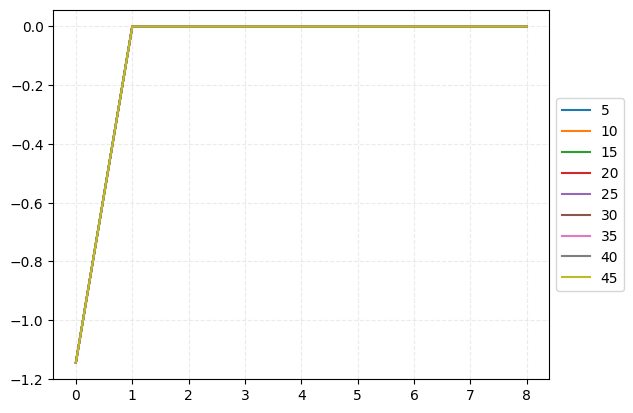

In [33]:
Summary_lasso_coef.plot(kind='line')
plt.grid(True, linestyle ='--', alpha=0.25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
plt.savefig(f'{mkdir_graphics}/visualisation_lambda_lasso.png')

<Figure size 640x480 with 0 Axes>

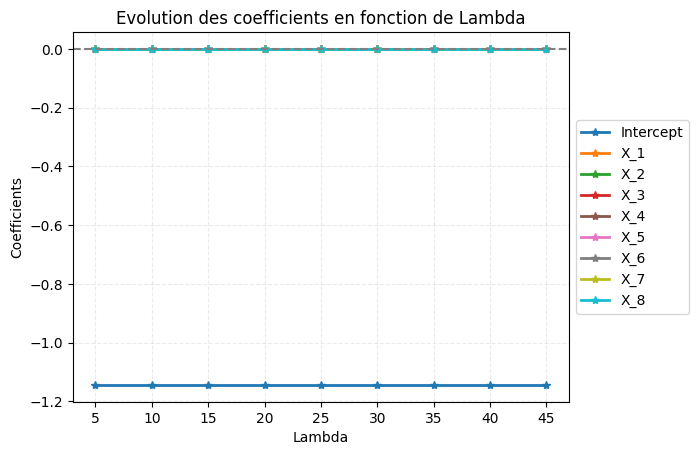

In [35]:
visualization_shrinking(Summary_lasso_coef)

In [36]:
plt.savefig(f'{mkdir_graphics}/visualisation_coefficient_skrinkage_lasso.png')

<Figure size 640x480 with 0 Axes>

# 6. Analyse des Prédictions des Modèles de Régression

In [37]:
# Création du dataframe
data_predictions = pd.DataFrame({"Obs_True":Target.ravel()})

In [38]:
# Prédiction des modèles de régression
RegMCO_y_s_pred = RegMCO.predict(Predictors)
RegRidge_y_s_pred = RegRidge.predict(Predictors)
RegLasso_y_s_pred = RegLasso.predict(Predictors)

In [39]:
# Matrice des prédictions
data_predictions['Obs_Pred_Mco'] = RegMCO_y_s_pred
data_predictions['Obs_Pred_Ridge'] = RegRidge_y_s_pred
data_predictions['Obs_Pred_Lasso'] = RegLasso_y_s_pred

In [40]:
# Aperçu de la base de données
data_predictions.head(5)

,Obs_True,Obs_Pred_Mco,Obs_Pred_Ridge,Obs_Pred_Lasso
0,11.971990,12.283320,12.250665,9.062306
1,-4.618505,-4.160743,-4.179133,-3.017665
2,-1.672278,0.256781,0.262470,0.116051
3,-1.187008,-0.287863,-0.275949,-0.373704
4,-4.069689,-2.889365,-2.868472,-2.424315


In [41]:
# Sauvegarder de la base de données de prédiction
data_predictions.to_csv(f"{mkdir_data}/data_predictions.csv", index=False)

# Visualisation des prédictions

[]

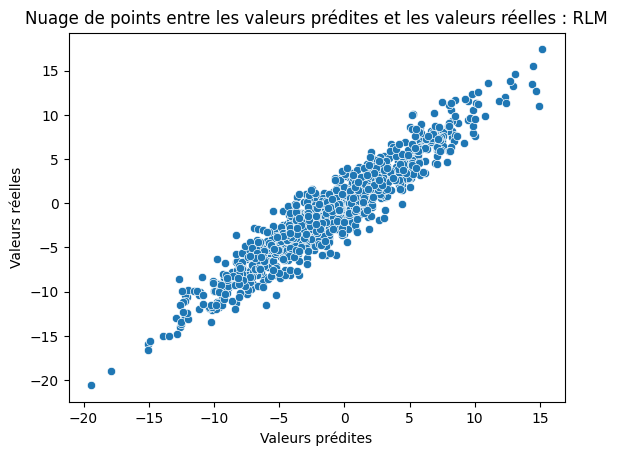

In [42]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Mco', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RLM')
plt.plot()

In [43]:
plt.savefig(f'{mkdir_graphics}/visualisation_prediction_mco.png')

<Figure size 640x480 with 0 Axes>

[]

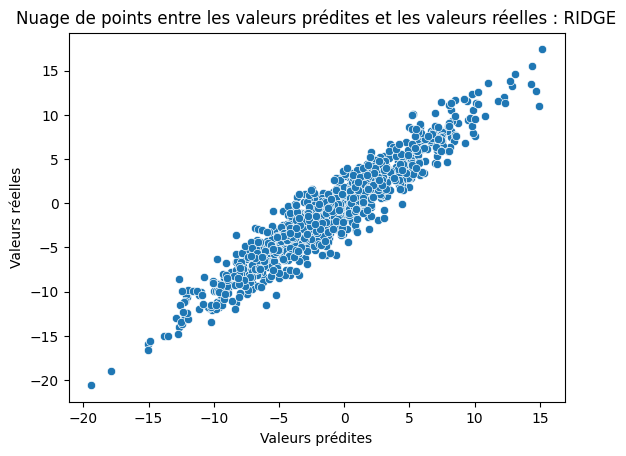

In [44]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Ridge', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RIDGE')
plt.plot()

In [45]:
plt.savefig(f'{mkdir_graphics}/visualisation_prediction_ridge.png')

<Figure size 640x480 with 0 Axes>

[]

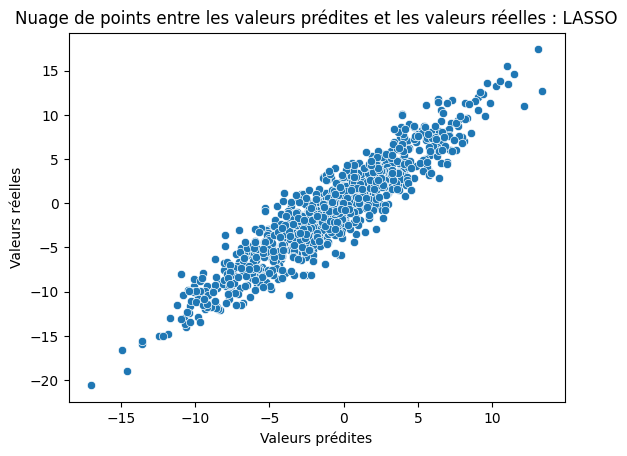

In [46]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Lasso', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : LASSO')
plt.plot()

In [47]:
plt.savefig(f'{mkdir_graphics}/visualisation_prediction_lasso.png')

<Figure size 640x480 with 0 Axes>

# Etapes Suivantes :

1. Installation des packages à partir du terminal
2. Création d'une fonction permettant de simuler des residus et d'effectuer des statistiques descriptives
3. Implémebntation de B_ridge lorsque Lambda grandi et visualiisation (GridResearchCV avec CV=1 ou chercher des alternatives)
4. Implémentation de B_lasso lorsque  Lambda grandi et visualisation (GridResearchCV avec CV=1 ou chercher des alternatives)
5. Courbes de niveau des estimateurs
6.